## Install Packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [6]:
df = pd.read_csv("data/study.csv")

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Basic Structure Check

In [8]:
df.shape

(1000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Column meaning audit

In [38]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

**Categorical:** gender, race_enthnicity, parantal_level_of_education, lunch, test_preparation_course.<br> 
**Numerical:** math_score, reading_score, writing_score.

## Missing and Duplicate data

In [39]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [41]:
df.duplicated().sum()

np.int64(0)

No missing or duplicate values

## Univarite Analysis - Categorical

In [49]:
categorical_cols = ["gender", "race_ethnicity", "parental_level_of_education", "lunch", "test_preparation_course"]
for col in categorical_cols:
    print(f"\n{col.upper()}")    
    print(df[col].value_counts(normalize=True) * 100)


GENDER
gender
female    51.8
male      48.2
Name: proportion, dtype: float64

RACE_ETHNICITY
race_ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

PARENTAL_LEVEL_OF_EDUCATION
parental_level_of_education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64

LUNCH
lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64

TEST_PREPARATION_COURSE
test_preparation_course
none         64.2
completed    35.8
Name: proportion, dtype: float64


There is class imbalance present

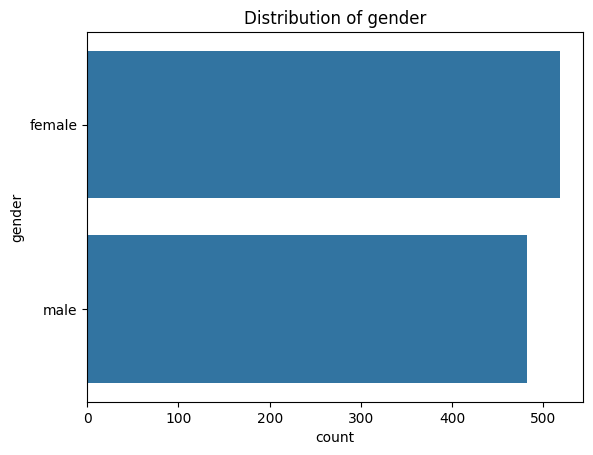

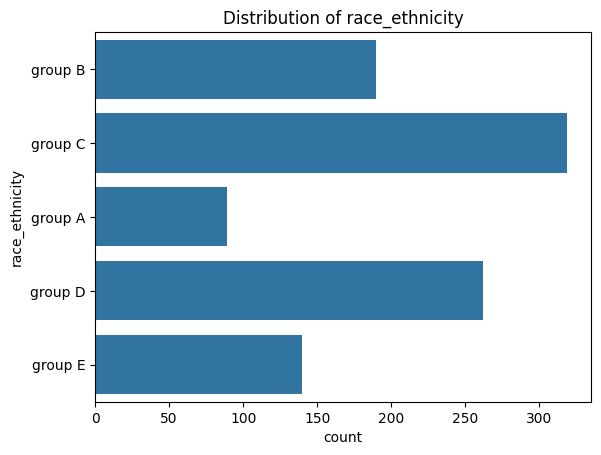

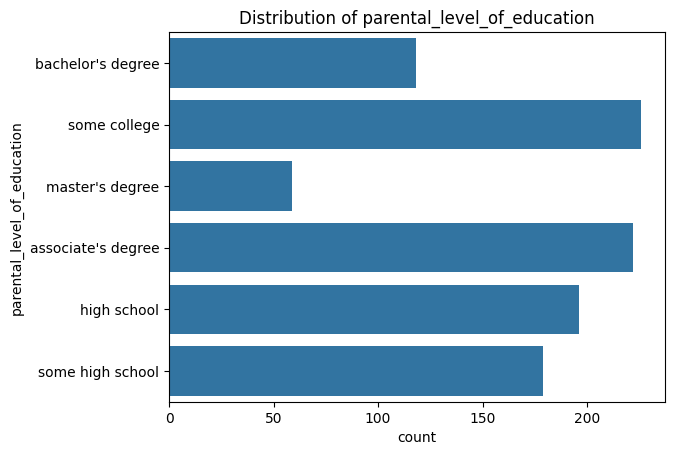

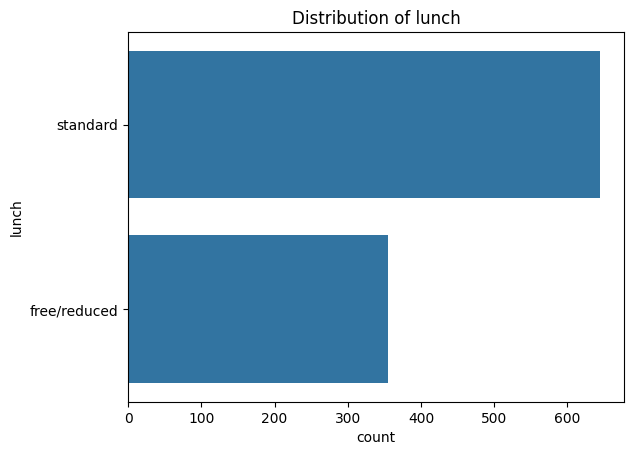

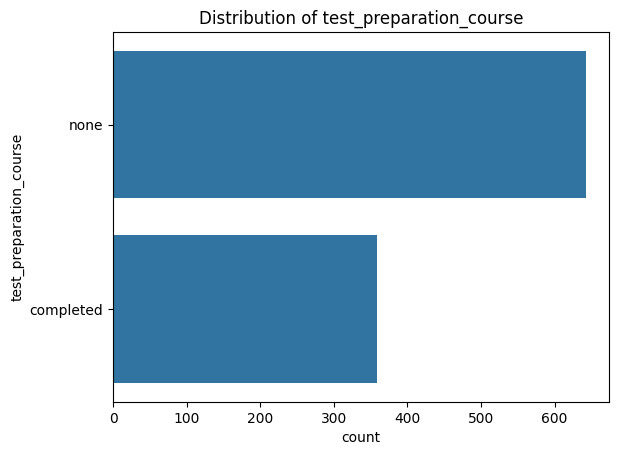

In [50]:
for col in categorical_cols:
    sns.countplot(y=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

## Univariate Analysis - Numerical

In [12]:
score_cols = ["math_score", "reading_score", "writing_score"]
df[score_cols].describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df[score_cols].skew()

math_score      -0.278935
reading_score   -0.259105
writing_score   -0.289444
dtype: float64

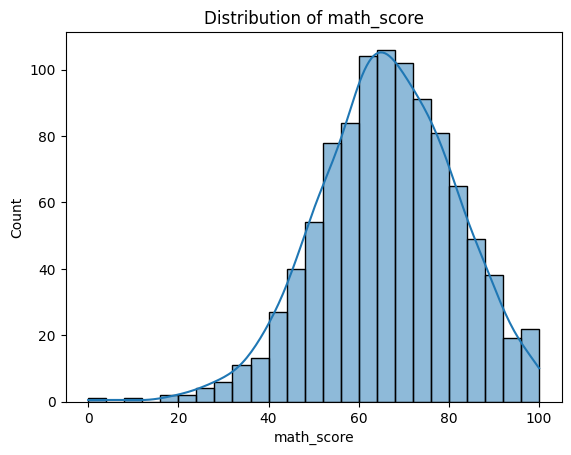

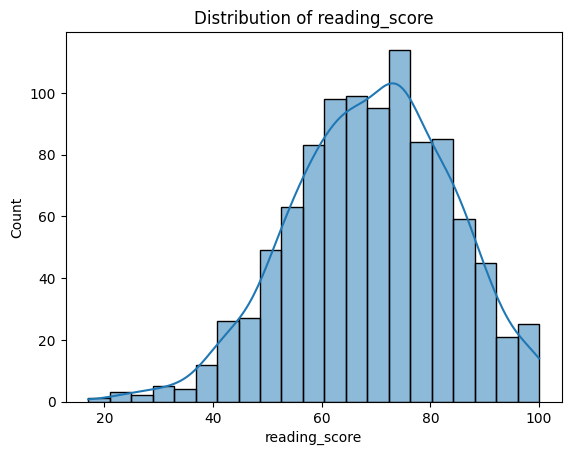

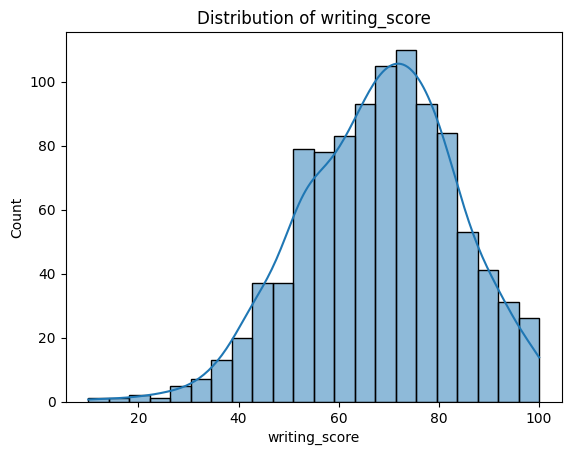

In [16]:
for col in score_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Bivariate Analysis

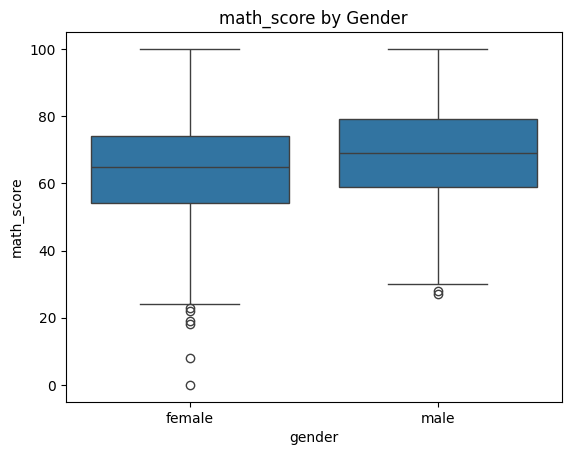

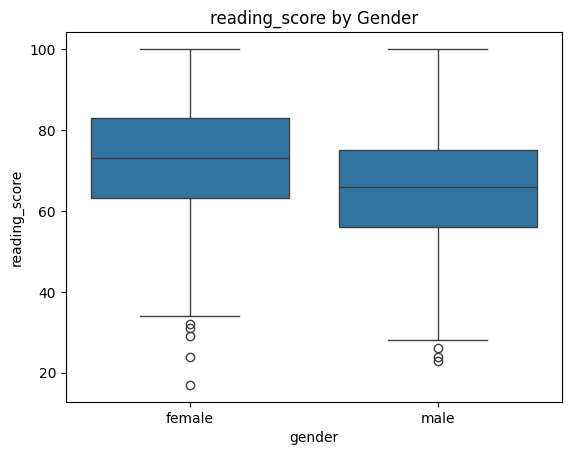

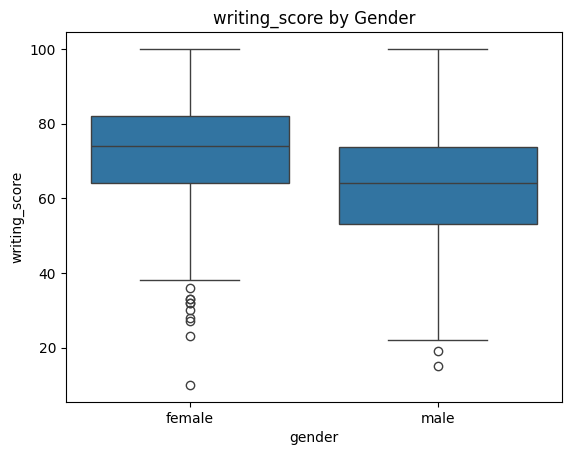

In [18]:
for col in score_cols:
    sns.boxplot(x='gender', y=col, data=df)
    plt.title(f'{col} by Gender')
    plt.show()

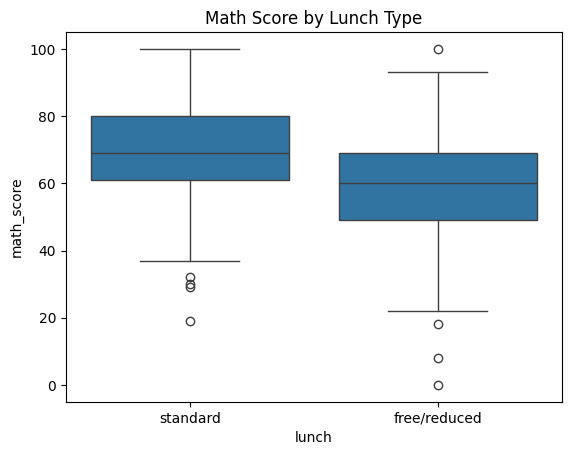

In [19]:
sns.boxplot(x='lunch', y='math_score', data=df)
plt.title('Math Score by Lunch Type')
plt.show()

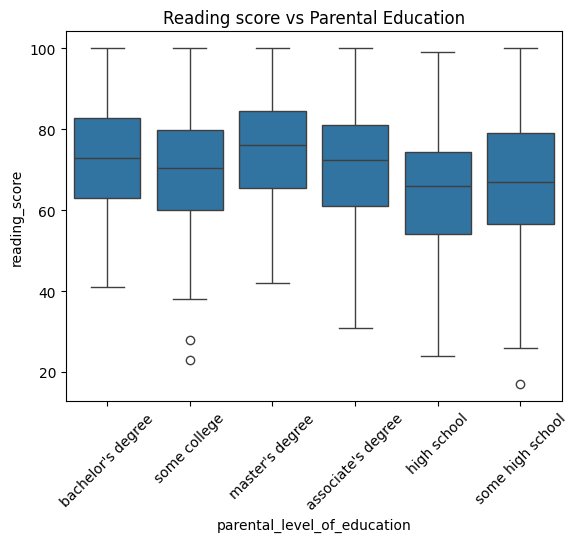

In [21]:
sns.boxplot(x='parental_level_of_education', y='reading_score', data=df)
plt.xticks(rotation=45)
plt.title('Reading score vs Parental Education')
plt.show()

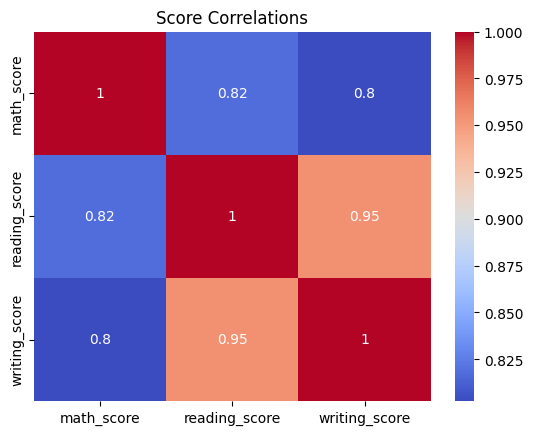

In [22]:
sns.heatmap(df[score_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Score Correlations')
plt.show()